In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.optimize
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()
import pysces
import pandas as pd
import lmfit

Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Continuation routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.22.3) with SciPy (1.8.0)


Could not find GLIMDA.


Assimulo CVode available
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = C:\Users\Francel\Pysces\psc
pysces.output_dir = C:\Users\Francel\Pysces


***********************************************************************
* Welcome to PySCeS (1.0.1) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2022  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS with: doi:10.1093/bioinformatics/bti046          *
***********************************************************************


In [2]:
data = pd.read_excel (r"C:\Users\Francel\Masters project\CoaD Data\Combined data\Combined data.xlsx")

In [3]:
data

,Unnamed: 0,rate,PpanSH,ATP
0,Sample_A01,2.849681,1.0000,0.25
1,Sample_B01,2.483602,0.5000,0.25
2,Sample_C01,2.399183,0.2500,0.25
3,Sample_D01,2.087368,0.1250,0.25
4,Sample_E01,1.635789,0.0625,0.25
...,...,...,...,...
79,Sample_B01,2.184940,0.5000,0.25
80,Sample_C01,2.031706,0.2500,0.25
81,Sample_D01,1.805905,0.1250,0.25
82,Sample_E01,1.402046,0.0625,0.25


In [4]:
#Ppan = PpanSH
#CTP = ATP
def vmax(vf, kppansh, katp, ppansh, atp): #MM
    return (vf*ppansh*atp)/((ppansh+kppansh)*(atp+katp))

In [5]:
indiv_rate = np.array(pd.concat([data.rate]))
indiv_ATP = np.array(pd.concat([data.ATP]))
indiv_PpanSH = np.array(pd.concat([data.PpanSH]))

In [6]:
datadict = {'Rate': indiv_rate, 'ATP': indiv_ATP, 'PpanSH': indiv_PpanSH}
fulldata = pd.DataFrame(datadict)

In [7]:
fulldata

,Rate,ATP,PpanSH
0,2.849681,0.25,1.0000
1,2.483602,0.25,0.5000
2,2.399183,0.25,0.2500
3,2.087368,0.25,0.1250
4,1.635789,0.25,0.0625
...,...,...,...
79,2.184940,0.25,0.5000
80,2.031706,0.25,0.2500
81,1.805905,0.25,0.1250
82,1.402046,0.25,0.0625


In [8]:
mymod4 = Model(vmax, independent_vars=['ppansh', 'atp'])
mypar4 = mymod4.make_params(vf=1, kppansh=1, katp=1)
for p in mypar4:
    mypar4[p].set(min=1e-6, max=1000)
myfit4 = mymod4.fit(fulldata['Rate'], params=mypar4, ppansh=fulldata['PpanSH'], atp=fulldata['ATP'], nan_policy='omit')
print(myfit4.fit_report())

[[Model]]
    Model(vmax)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 82
    # variables        = 3
    chi-square         = 4.71213831
    reduced chi-square = 0.05964732
    Akaike info crit   = -228.239351
    Bayesian info crit = -221.019193
[[Variables]]
    vf:       2.83133408 +/- 0.07120353 (2.51%) (init = 1)
    kppansh:  0.04383527 +/- 0.00426995 (9.74%) (init = 1)
    katp:     0.02412176 +/- 0.00293304 (12.16%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(vf, kppansh) = 0.651
    C(vf, katp)    = 0.509


In [9]:
ATPvals = data.ATP.unique()
PpanSHvals = data.PpanSH.unique()

In [10]:
data

,Unnamed: 0,rate,PpanSH,ATP
0,Sample_A01,2.849681,1.0000,0.25
1,Sample_B01,2.483602,0.5000,0.25
2,Sample_C01,2.399183,0.2500,0.25
3,Sample_D01,2.087368,0.1250,0.25
4,Sample_E01,1.635789,0.0625,0.25
...,...,...,...,...
79,Sample_B01,2.184940,0.5000,0.25
80,Sample_C01,2.031706,0.2500,0.25
81,Sample_D01,1.805905,0.1250,0.25
82,Sample_E01,1.402046,0.0625,0.25


<IPython.core.display.Javascript object>


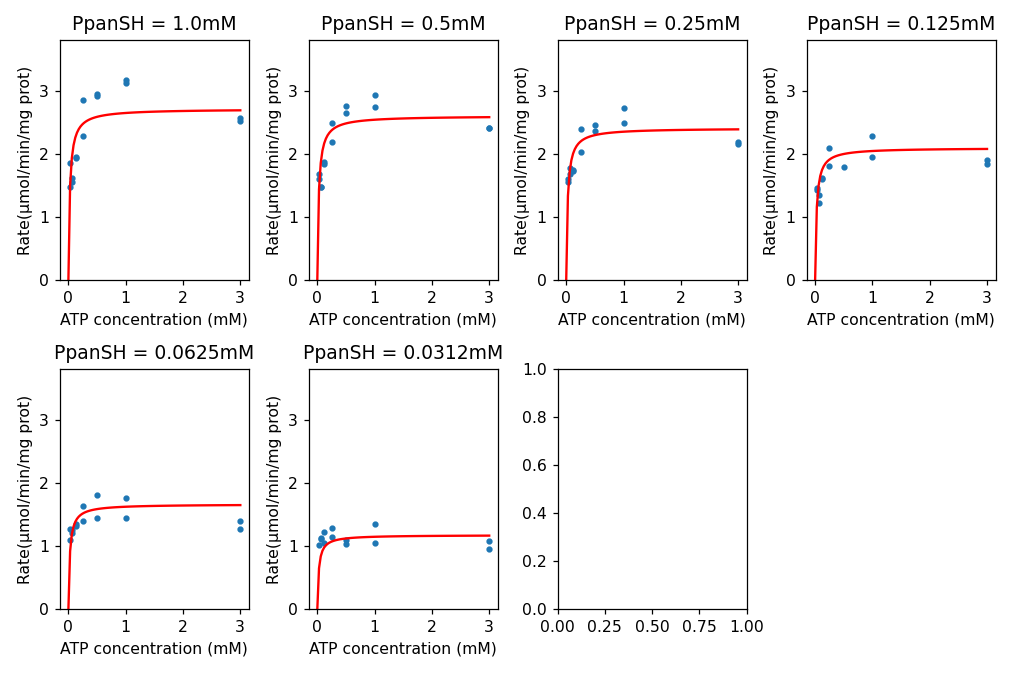

In [12]:
xvals = np.linspace(0, data.ATP.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(PpanSHvals)):
    ax[i//4,i%4].plot(data[data.PpanSH==PpanSHvals[i]].ATP, data[data.PpanSH==PpanSHvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, atp=xvals, ppansh=PpanSHvals[i]), 'r-')
    ax[i//4,i%4].set_title('PpanSH = '+str(PpanSHvals[i])+str('mM'))
    ax[i//4,i%4].set_xlabel('ATP concentration (mM)')
    ax[i//4,i%4].set_ylabel('Rate(µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.rate.max()*1.2)
ax[1,3].set_visible(False)
f.tight_layout()

In [50]:
plt.savefig("figure.png")

In [51]:
plt.close('all')

<IPython.core.display.Javascript object>


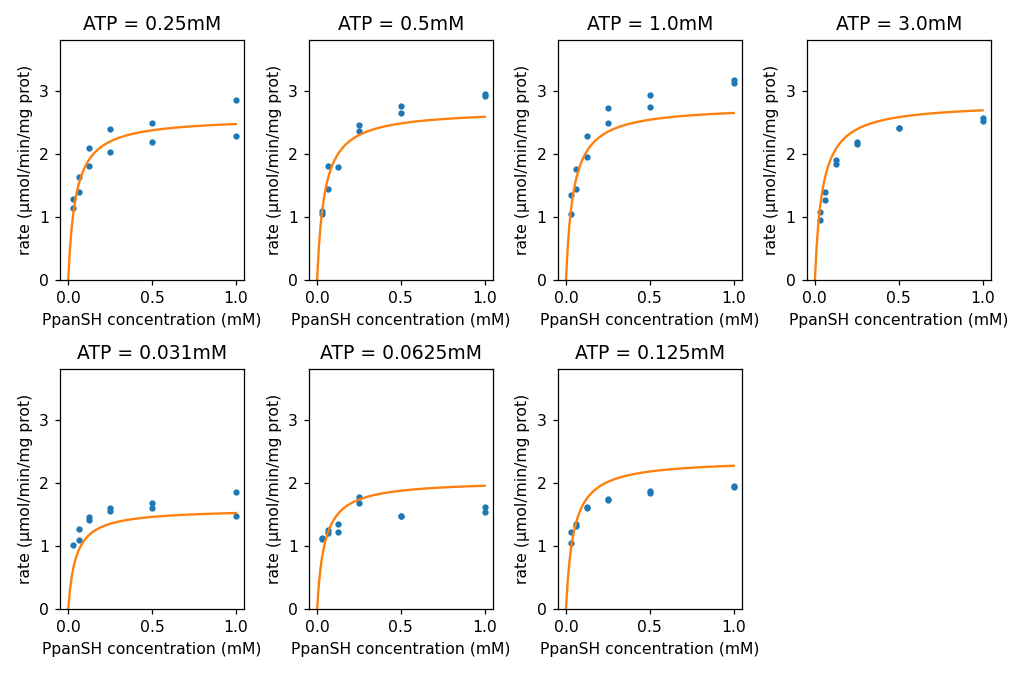

In [52]:
xvals = np.linspace(0, data.PpanSH.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(ATPvals)):
    ax[i//4,i%4].plot(data[data.ATP==ATPvals[i]].PpanSH, data[data.ATP==ATPvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, atp=ATPvals[i], ppansh=xvals), '-')
    ax[i//4,i%4].set_title('ATP = '+str(ATPvals[i])+str('mM'))
    ax[i//4,i%4].set_xlabel('PpanSH concentration (mM)')
    ax[i//4,i%4].set_ylabel('rate (µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.rate.max()*1.2)
ax[1,3].set_visible(False)
f.tight_layout()

In [53]:
plt.savefig("figure2.png")

In [54]:
plt.close('all')

## Identifiability Analysis:

In [55]:
from identifiability import conf_interval
import lmfit

In [56]:
ci = conf_interval(myfit4, myfit4, limits=0.5, return_CIclass=True, mp=False)
ci[0]

OrderedDict([('vf', (2.688840064380586, 2.98048205635763)),
             ('kppansh', (0.0358404154297014, 0.05307292291270371)),
             ('katp', (0.018441405271590883, 0.03067054344148918))])

<IPython.core.display.Javascript object>


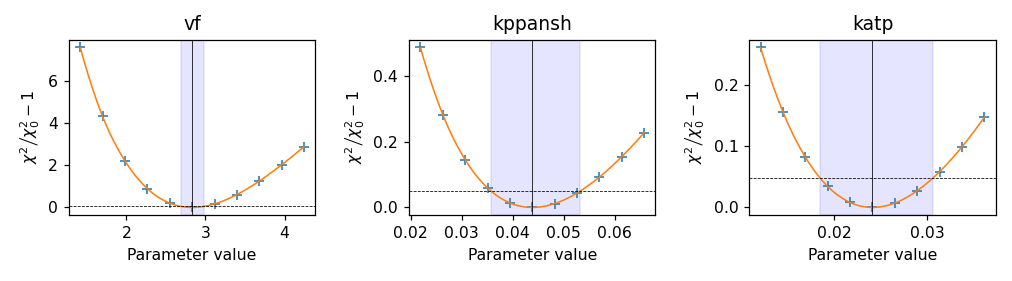

In [57]:
 ci[1].plot_all_ci()

In [58]:
plt.close('all')